## Intro to Convolutional Neural Networks
**CNN** is a class of neural networks which are specialized in image processing,pattern recognition and computer vision tasks.


**Convolutuion Layer :-** 
1. This layer applies Convolutional operations to the input data using kernels or filters.
2. Neurons of Convolutional Opeartor can recognize certain local patterns of the previous layer's output.
3. Majority of Computations happended in CNN layer, which also builiding block of CNN.
<br>
**Activation Function :-** 
1. As the name suggest it used to activate some neurons(single cell).
2. It also used add non-linearity to the ConvNet(CNN). 
3. Mainly used activations functions are RELU and LEAKY-RELU which help in mitigating vanishing gradient problem.
<br>
**Pooling Layer :-** 
1. It is used to reduces the number of parameters in the input, which helps in CNN Computation efficiency and makes CNN Robust. Loss of information is the downside.
<br>
**Normalization :-** 
1. They help in adding convergence and generalization to the neural networks.
2. Batch normalization, it is a process to make neural networks faster and more stable through adding extra layers in a deep neural network. The new layer performs the standardizing and normalizing operations on the input of a layer coming from a previous layer.
<br>
**Dropout layer :-**
1. It is used to drop a fraction of neurons which helps to prevent Overfitting.
<br>
**Flatten Layer :-**
1. Converts the input of previous layer into 1-D feature Vector and Passes to Fully Connected layer.
2. This layer is where learning stops.
<br>
**Fully Connected Layer :-**
1. This layer used for classification purposes
2. In this layers each and every neurtron is connected with one another.


In [1]:
## data manipulation and plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## nueral network creation
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout,AveragePooling2D,GlobalAveragePooling2D
from keras.models import Sequential ##  sequential model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

## pre-trained model
from tensorflow.keras.applications import VGG16


from sklearn.metrics import confusion_matrix,classification_report

import os, shutil
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


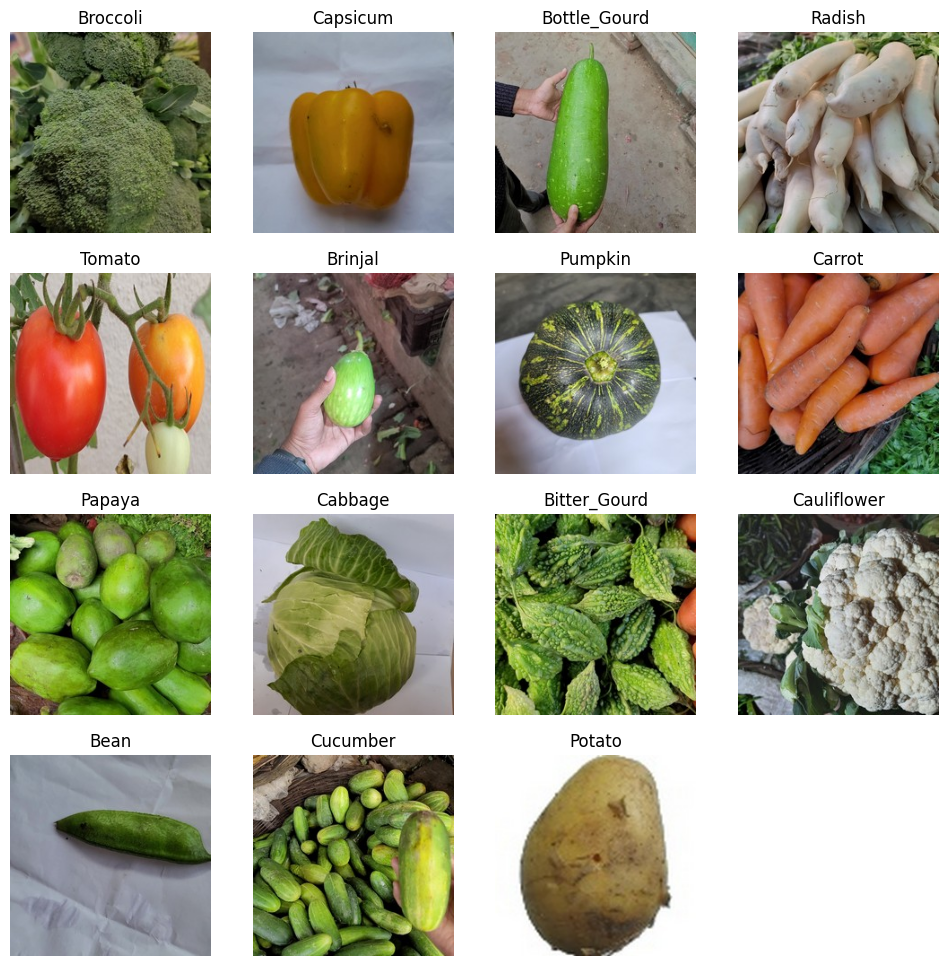

In [2]:
# Look at Vegetables
train_path = "../input/vegetable-image-dataset/Vegetable Images/train"
validation_path = "../input/vegetable-image-dataset/Vegetable Images/validation"
test_path = "../input/vegetable-image-dataset/Vegetable Images/test"

image_categories = os.listdir('../input/vegetable-image-dataset/Vegetable Images/train')

def plot_images(image_categories):
    
    # Create a figure
    plt.figure(figsize=(12, 12))
    for i, cat in enumerate(image_categories):
        
        # Load images for the ith category
        image_path = train_path + '/' + cat
        images_in_folder = os.listdir(image_path)
        first_image_of_folder = images_in_folder[i]
        first_image_path = image_path + '/' + first_image_of_folder
        img = image.load_img(first_image_path)
        img_arr = image.img_to_array(img)/255
        
        
        # Create Subplot and plot the images
        plt.subplot(4, 4, i+1)
        plt.imshow(img_arr)
        plt.title(cat)
        plt.axis('off')
        
    plt.show()

plot_images(image_categories)

<Axes: >

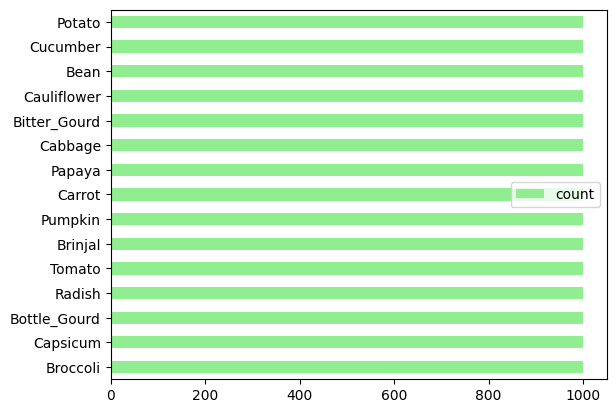

In [3]:
## target distribution in training dataset

images_length={}
for i, cat in enumerate(image_categories):
        
        # Load images for the ith category
        image_path = train_path + '/' + cat
        images_in_folder = os.listdir(image_path)
        images_length[cat]=len(images_in_folder)
        
pd.DataFrame(images_length,index = ['count']).T.plot(kind='barh',color='lightgreen')

## Prepare Datasets

In [4]:
''' Data Augmentation: is a process to increase training set generating new data points from existing Data.
    Only applicable at Training Phase.
'''
# 1. Train Set
train_gen = ImageDataGenerator( rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                fill_mode='nearest') 
train_image_generator = train_gen.flow_from_directory(
                                            train_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

# 2. Validation Set
val_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
val_image_generator = val_gen.flow_from_directory(
                                            validation_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

#3. Testing Set
test_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
test_image_generator = test_gen.flow_from_directory(
                                            validation_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [5]:
''' encoding labels '''

class_map = dict([(v, k) for k, v in train_image_generator.class_indices.items()])
print(class_map)

{0: 'Bean', 1: 'Bitter_Gourd', 2: 'Bottle_Gourd', 3: 'Brinjal', 4: 'Broccoli', 5: 'Cabbage', 6: 'Capsicum', 7: 'Carrot', 8: 'Cauliflower', 9: 'Cucumber', 10: 'Papaya', 11: 'Potato', 12: 'Pumpkin', 13: 'Radish', 14: 'Tomato'}


## CNN Model

In [6]:
model = Sequential() 

# Add Layers
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=[150, 150, 3]))
model.add(MaxPooling2D(2, ))

model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2))

# Flatten the feature map
model.add(Flatten())

# Add the fully connected layers
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dense(15, activation='softmax'))

# print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 87616)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [7]:
# Compile and fit the model
''' 
 Early Stopping : is a regularization technique which is used to prevent overfitting and improve generalization performance.
 The Basic Idea is that to monitor the model's performance on validation data , if performances are not improving 
 
 '''
early_stopping = keras.callbacks.EarlyStopping(patience=5,monitor='val_loss',restore_best_weights=True) # Set up callbacks


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics='accuracy')
hist = model.fit(train_image_generator, 
                 epochs=100, 
                 verbose=1, 
                 validation_data=val_image_generator, 
                 steps_per_epoch = 15000//32, 
                 validation_steps = 3000//32, 
                 callbacks=early_stopping,
                 workers=4
                )

Epoch 1/100
468/468 [==============================] - 75s 139ms/step - loss: 1.6478 - accuracy: 0.4552 - val_loss: 3.1272 - val_accuracy: 0.2433
Epoch 2/100
468/468 [==============================] - 56s 120ms/step - loss: 1.2060 - accuracy: 0.5937 - val_loss: 1.0579 - val_accuracy: 0.6257
Epoch 3/100
468/468 [==============================] - 56s 119ms/step - loss: 1.0144 - accuracy: 0.6591 - val_loss: 1.9288 - val_accuracy: 0.4869
Epoch 4/100
468/468 [==============================] - 57s 121ms/step - loss: 0.9739 - accuracy: 0.6766 - val_loss: 1.8004 - val_accuracy: 0.4845
Epoch 5/100
468/468 [==============================] - 56s 120ms/step - loss: 1.0201 - accuracy: 0.6612 - val_loss: 12.6142 - val_accuracy: 0.1378
Epoch 6/100
468/468 [==============================] - 56s 120ms/step - loss: 1.2018 - accuracy: 0.6007 - val_loss: 1.9371 - val_accuracy: 0.4466
Epoch 7/100
468/468 [==============================] - 56s 119ms/step - loss: 0.9602 - accuracy: 0.6778 - val_loss: 1.2698 

In [8]:
## helper function to plot......
def plot(hist):
    h = hist.history
    plt.style.use('ggplot')
    plt.figure(figsize=(10, 5))
    plt.plot(h['loss'], c='red', label='Training Loss')
    plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
    plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
    plt.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
    plt.xlabel("Number of Epochs")
    plt.legend(loc='best')
    plt.show()

## helper function to get accuracy of the model
def eval_(model):
    test_loss, test_acc =model.evaluate(test_image_generator)
    return f'Model Test loss : {np.round(test_loss,2)} and Test Accuracy : {np.round(test_acc,2)} '


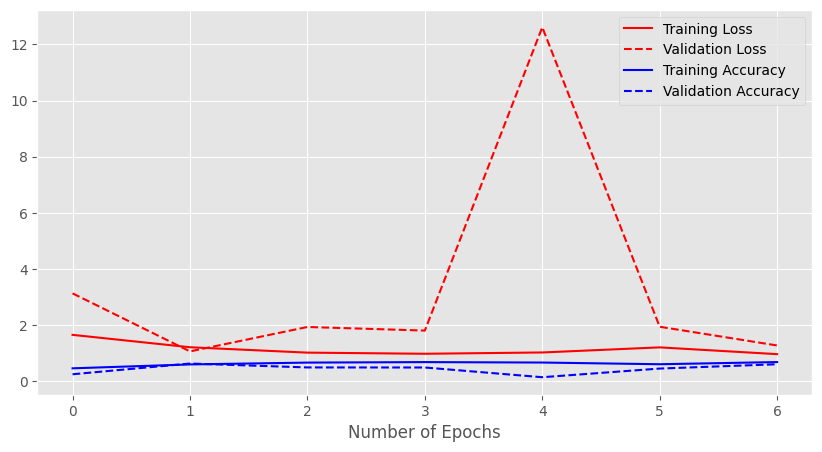

In [9]:
plot(hist)

In [10]:
print(eval_(model))

94/94 [==============================] - 5s 55ms/step - loss: 1.0596 - accuracy: 0.6250
Model Test loss : 1.06 and Test Accuracy : 0.62 


## Transfer Learning
1. It is a machine learning process where model trained one task is adapted for a related task.
2. Here We take model which is Pre-trained on ImageNet, use that knolwedge for our task of classification of images.


In [11]:
'''
1. Create base model
2. use imagent weights (or) else
3. Remove fully connected layers after removing now base model acts as a powerful feature extractor.
'''

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))

# Frezzing all the layers which prevents the weights being updated
for layer in base_model.layers:
    layer.trainable = False

## Add new layers to the Model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.25),
    Dense(128, activation='relu'),
    Dense(15, activation='softmax')
])


early_stopping = keras.callbacks.EarlyStopping(patience=3,monitor='val_loss',restore_best_weights=True) # Set up callbacks

## compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics='accuracy')

##fit the model
hist = model.fit(train_image_generator, 
                 epochs=100, 
                 verbose=1, 
                 validation_data=val_image_generator, 
                 steps_per_epoch = 15000//32, 
                 validation_steps = 3000//32, 
                 callbacks=early_stopping,
                workers=4)

58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/100
468/468 [==============================] - 55s 111ms/step - loss: 1.9634 - accuracy: 0.4127 - val_loss: 1.0857 - val_accuracy: 0.7503
Epoch 2/100
468/468 [==============================] - 53s 113ms/step - loss: 1.0625 - accuracy: 0.7051 - val_loss: 0.5794 - val_accuracy: 0.8555
Epoch 3/100
468/468 [==============================] - 53s 113ms/step - loss: 0.7569 - accuracy: 0.7788 - val_loss: 0.4033 - val_accuracy: 0.8945
Epoch 4/100
468/468 [==============================] - 52s 111ms/step - loss: 0.6073 - accuracy: 0.8198 - val_loss: 0.3100 - val_accuracy: 0.9123
Epoch 5/100
468/468 [==============================] - 53s 113ms/step - loss: 0.5182 - accuracy: 0.8425 - val_loss: 0.2485 - val_accuracy: 0.9281
Epoch 6/100
468/468 [==============================] - 53s 113ms/step - loss: 0.4628 - accuracy: 0.8594 - val_loss: 0.2142 - val_accuracy: 0.9362
Epoch 7/100
468/468 [==============================] - 52s 

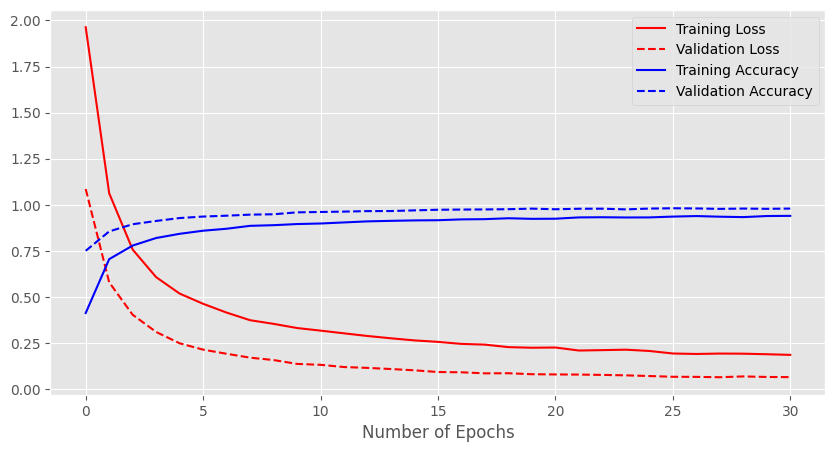

In [12]:
plot(hist)

In [13]:
eval_(model)

94/94 [==============================] - 6s 60ms/step - loss: 0.0800 - accuracy: 0.9740


'Model Test loss : 0.08 and Test Accuracy : 0.97 '

In [14]:
## Freeze A Few layers

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))

# Frezzing all the layers which prevents the waits being updated
for layer in base_model.layers:
    layer.trainable = False
    
# unFrezzing last few layers 
for layer in base_model.layers[-6:]:
    layer.trainable = True

## Add new layers to the Model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(15, activation='softmax') 
])

early_stopping = keras.callbacks.EarlyStopping(patience=3,monitor='val_loss',restore_best_weights=True) # Set up callbacks

## compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics='accuracy')

##fit the model
hist = model.fit(train_image_generator, 
                 epochs=100, 
                 verbose=1, 
                 validation_data=val_image_generator, 
                 steps_per_epoch = 15000//32, 
                 validation_steps = 3000//32, 
                 callbacks=early_stopping,
                workers=4)

Epoch 1/100
468/468 [==============================] - 56s 113ms/step - loss: 0.4534 - accuracy: 0.8596 - val_loss: 0.1453 - val_accuracy: 0.9530
Epoch 2/100
468/468 [==============================] - 54s 114ms/step - loss: 0.1249 - accuracy: 0.9621 - val_loss: 0.0447 - val_accuracy: 0.9886
Epoch 3/100
468/468 [==============================] - 54s 114ms/step - loss: 0.0816 - accuracy: 0.9759 - val_loss: 0.0984 - val_accuracy: 0.9735
Epoch 4/100
468/468 [==============================] - 53s 113ms/step - loss: 0.0667 - accuracy: 0.9797 - val_loss: 0.0307 - val_accuracy: 0.9919
Epoch 5/100
468/468 [==============================] - 53s 113ms/step - loss: 0.0596 - accuracy: 0.9824 - val_loss: 0.0240 - val_accuracy: 0.9929
Epoch 6/100
468/468 [==============================] - 54s 115ms/step - loss: 0.0597 - accuracy: 0.9836 - val_loss: 0.0134 - val_accuracy: 0.9973
Epoch 7/100
468/468 [==============================] - 54s 115ms/step - loss: 0.0551 - accuracy: 0.9852 - val_loss: 0.0304 -

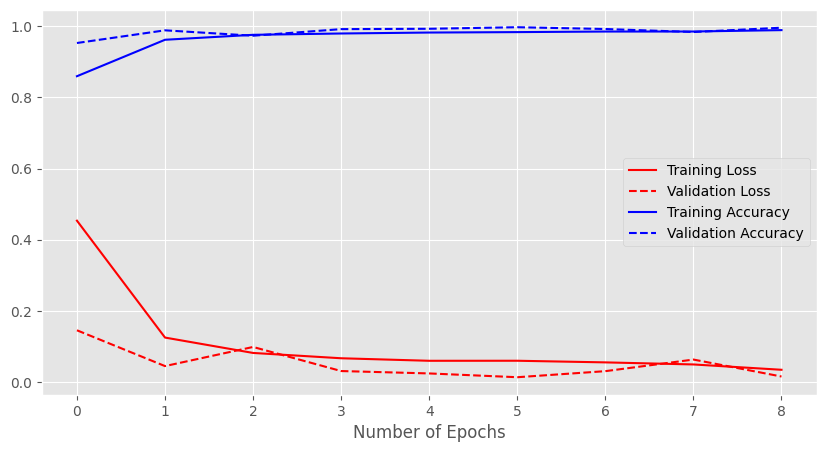

In [15]:
plot(hist)

In [16]:
eval_(model)

94/94 [==============================] - 5s 57ms/step - loss: 0.0314 - accuracy: 0.9957


'Model Test loss : 0.03 and Test Accuracy : 1.0 '

## Predictions

In [17]:
def predict(label,image_number):

    if label not in class_map.values() or image_number >=200:
        print('Wrong Input 1. check if label in those 15 classes 2. image_number must be less than 1000')
    image_path = train_path + '/' + label
    images_in_folder = os.listdir(image_path)
    first_image_of_folder = images_in_folder[image_number]
    image_path += '/'+first_image_of_folder
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img)/255
    test_img_input = img_array.reshape((1, img_array.shape[0], img_array.shape[1], img_array.shape[2]))
    print(class_map[np.argmax(model.predict(test_img_input))])

predict('Brinjal',96)  

1/1 [==============================] - 0s 371ms/step
Brinjal


1. Now try to use ML Models instead of Fully Connected Layers
2. Caution : Early Stopping some times causes model to stop early with out even proper training

In [18]:
!wget "https://www.dropbox.com/s/lge1plvr4mg5w7y/potato_2.jpg?dl=0"

--2023-12-25 10:40:17--  https://www.dropbox.com/s/lge1plvr4mg5w7y/potato_2.jpg?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/lge1plvr4mg5w7y/potato_2.jpg [following]
--2023-12-25 10:40:17--  https://www.dropbox.com/s/raw/lge1plvr4mg5w7y/potato_2.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb87449b2eff7d6fd138846a224.dl.dropboxusercontent.com/cd/0/inline/CKHM48jW7sHt0WfUdIzE1Y_nnULrnore1v8bX9G2AHVVFP-TmYYyzmrIapPNU6cjqtzqaZsQHYn9dQEp7YA0pxgQU1kd_cSdydJFEBzHCsZe60iSG-SfeV54qYj8ozANI-FQEoZeSrFNMoe2R8oJP8JB/file# [following]
--2023-12-25 10:40:17--  https://ucb87449b2eff7d6fd138846a224.dl.dropboxusercontent.com/cd/0/inline/CKHM48jW7sHt0WfUdIzE1Y_nnULrnore1v8bX9G2AHVVFP-TmYYyzmrIapPNU6cjqtzqaZsQHYn9dQEp7YA0pxgQU1kd_cSdy

In [19]:
external_image_path_2 = "./potato_2.jpg?dl=0"
img = image.load_img(external_image_path_2, target_size=(150, 150))
img_array = image.img_to_array(img)/255
test_img_input = img_array.reshape((1, img_array.shape[0], img_array.shape[1], img_array.shape[2]))
print(class_map[np.argmax(model.predict(test_img_input))])

1/1 [==============================] - 0s 22ms/step
Tomato
